1) 붓꽃데이터 활용

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X,y_ori = iris.data, iris.target

In [3]:
y_ori

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from tensorflow.keras.utils import to_categorical
#y가 원핫인코딩 되어있어야
y= to_categorical(y_ori,3)

In [5]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
#인공신경망 모형 구성
from keras.models import Sequential
from keras.layers import Dense

#sequential 이용해 신경망의 층을 순서대로 쌓을 수 있도록 초기화
model = Sequential()

# units : 해당 층에 배치 할 노드의 수
# input_dim : 입력 특성의 수, 입력 노드의 개수. 최초 은닉층 외에는 기재하지 않음
# kernel_initializer : 가중치들의 초기화, 설정방법
# activation : 활성화 함수
# 노드가 8개 있는 은닉층 1개와 최종 출력노드가 3개있는 출력층 생성
model.add(Dense(units=8, input_dim=4,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(units=3,activation='softmax'))

In [8]:
#모형의 학습과정에 대한 설정
# loss : 손실함수. 이진분류인 경우에 'binary_crossentropy' / 다중클래스 분류인 경우에 'categorical_crossentropy'
# optimizer : 가중치 최적화 위해 적용되는 알고리즘 이름
# metrics : 모형의 성능 평가 지표가 나열되는 목록
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [9]:
#모형 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [10]:
#아래 model.fit 에서 warning 발생시 아래문장 실행해준다.
#!pip install gast==0.3.3

In [11]:
#모형 학습
# epochs : 학습의 반복 횟수
# batch_size : 배치의 크기
# verbose : 학습 경과 출력하는 옵션. 0은 출력하지 않음 / 1은 매 합습 단계마다 진행막대와 상태 함께 출력 / 2는 진행막대 없이 매 학습 단계의 상태 출력
model.fit(X_train,y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2021-07-29 01:47:00.640093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-29 01:47:00.640401: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


105/105 - 0s - loss: 1.0522 - accuracy: 0.5619
Epoch 2/100
105/105 - 0s - loss: 0.9123 - accuracy: 0.6952
Epoch 3/100
105/105 - 0s - loss: 0.8008 - accuracy: 0.6952
Epoch 4/100
105/105 - 0s - loss: 0.7086 - accuracy: 0.6952
Epoch 5/100
105/105 - 0s - loss: 0.6309 - accuracy: 0.6952
Epoch 6/100
105/105 - 0s - loss: 0.5759 - accuracy: 0.6952
Epoch 7/100
105/105 - 0s - loss: 0.5292 - accuracy: 0.7048
Epoch 8/100
105/105 - 0s - loss: 0.4944 - accuracy: 0.6952
Epoch 9/100
105/105 - 0s - loss: 0.4577 - accuracy: 0.7619
Epoch 10/100
105/105 - 0s - loss: 0.4249 - accuracy: 0.8286
Epoch 11/100
105/105 - 0s - loss: 0.3960 - accuracy: 0.8571
Epoch 12/100
105/105 - 0s - loss: 0.3697 - accuracy: 0.9238
Epoch 13/100
105/105 - 0s - loss: 0.3448 - accuracy: 0.9238
Epoch 14/100
105/105 - 0s - loss: 0.3266 - accuracy: 0.9333
Epoch 15/100
105/105 - 0s - loss: 0.3064 - accuracy: 0.9619
Epoch 16/100
105/105 - 0s - loss: 0.2881 - accuracy: 0.9619
Epoch 17/100
105/105 - 0s - loss: 0.2772 - accuracy: 0.9333
E

In [12]:
#학습 결과를 명시적으로 반환한 뒤 history 기능 이용해 손실과 정확도의 변화 별도로 확인
hist = model.fit(X_train,y_train, epochs=100, batch_size=1, verbose=0)

In [13]:
#accuracy는 훈련정확도
hist.history['accuracy']

[0.9714285731315613,
 0.9714285731315613,
 0.9809523820877075,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613,
 0.9809523820877075,
 0.961904764175415,
 0.9809523820877075,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.9809523820877075,
 0.9809523820877075,
 0.9714285731315613,
 0.9714285731315613,
 0.9809523820877075,
 0.961904764175415,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.9809523820877075,
 0.9714285731315613,
 0.9714285731315613,
 0.9809523820877075,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9809523820877075,
 0.961904764175415,
 0.9904761910438538,
 0.9809523820877075,
 0.9809523820877075,
 0.9523809552192688,
 0.9809523820877075,
 0.9714285731315613,
 0.9809523820877075,
 0.9809523820877075,
 0.961904764175415,
 0.961904764175415,
 0.9809523820877075,
 0.

In [14]:
#loss는 훈련 손실값
hist.history['loss']

[0.07536045461893082,
 0.0624086894094944,
 0.06334850192070007,
 0.058270413428545,
 0.07382847368717194,
 0.06441324204206467,
 0.07465647906064987,
 0.05885685980319977,
 0.07140633463859558,
 0.06271503865718842,
 0.06305952370166779,
 0.06255853921175003,
 0.06505230814218521,
 0.06830994784832001,
 0.06770709156990051,
 0.059895675629377365,
 0.06221088394522667,
 0.06002986058592796,
 0.06419555842876434,
 0.06437548249959946,
 0.06129232421517372,
 0.060835737735033035,
 0.060734547674655914,
 0.060240041464567184,
 0.05754769593477249,
 0.06072547659277916,
 0.06473886966705322,
 0.05541517585515976,
 0.06149531900882721,
 0.0584324486553669,
 0.05954195186495781,
 0.06097202003002167,
 0.059090662747621536,
 0.06282617151737213,
 0.06309174001216888,
 0.058198511600494385,
 0.06040060520172119,
 0.0476946085691452,
 0.06523451209068298,
 0.05704877898097038,
 0.05926870182156563,
 0.05424448475241661,
 0.05330626666545868,
 0.06049181520938873,
 0.05416106432676315,
 0.061385

Text(0, 0.5, 'loss')

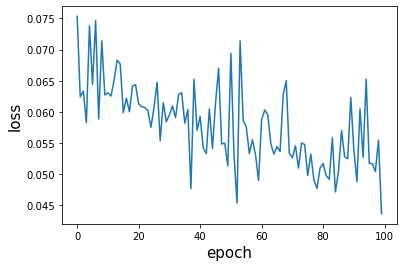

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.xlabel('epoch',fontsize=15)
plt.ylabel('loss',fontsize=15)

In [16]:
loss, acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.2667


In [17]:
print("손실값 : ",round(loss,3))
print('정확도 : ',round(acc,3))

손실값 :  0.001
정확도 :  0.267


In [18]:
#임의의 데이터에 대해 모형의 출력 확인
#최종 시험용 데이터 집합이 별도로 존재하는 경우 그 데이터 이용해 출력 확인
#별도 시험용 데이터 없는 경우 검증 데이터 사용 또는 임의도 데이터 직접 생성해 출력 확인
from numpy.random import random
from numpy import round

X_new=round(random([3,4])* 10,2)
print(X_new)

[[7.86 2.15 7.01 8.39]
 [5.01 7.77 6.72 5.09]
 [2.89 4.79 3.03 8.55]]


In [19]:
#새로운 데이터에 대한 출력 수행
#결과는 출력층의 활성화 함수에 의해 추정된 확률(소프트맥스 점수)
y_pred = model.predict(X_new)
print(y_pred)

[[1.4393996e-23 9.2843646e-07 9.9999905e-01]]


In [20]:
#결과로 분류된 클래스(레이블) 얻고 싶을때
y_pred_class = model.predict_classes(X_new)
print(y_pred_class)

[2]


/Users/song-go-eun/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2) mnist 데이터 활용

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [22]:
mnist = fetch_openml('mnist_784',version=1)
X = mnist.data
y_ori = mnist.target.astype(int)

In [23]:
y = to_categorical(y_ori,10)

In [24]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [25]:
model1 = Sequential()
model1.add(Dense(input_dim=784,units=20,activation='relu'))
model1.add(Dense(units=15,activation='relu'))
model1.add(Dense(units=10,activation='softmax'))

In [26]:
model1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100,verbose=2)

Epoch 1/10
490/490 - 2s - loss: 3.7295 - accuracy: 0.2120 - val_loss: 1.8465 - val_accuracy: 0.3321
Epoch 2/10
490/490 - 1s - loss: 1.6747 - accuracy: 0.3822 - val_loss: 1.6533 - val_accuracy: 0.4640
Epoch 3/10
490/490 - 1s - loss: 1.4108 - accuracy: 0.4738 - val_loss: 1.3422 - val_accuracy: 0.5380
Epoch 4/10
490/490 - 1s - loss: 1.2045 - accuracy: 0.5603 - val_loss: 1.1258 - val_accuracy: 0.5922
Epoch 5/10
490/490 - 1s - loss: 1.0209 - accuracy: 0.6270 - val_loss: 0.9384 - val_accuracy: 0.6684
Epoch 6/10
490/490 - 1s - loss: 0.8579 - accuracy: 0.6885 - val_loss: 0.8313 - val_accuracy: 0.6942
Epoch 7/10
490/490 - 1s - loss: 0.7648 - accuracy: 0.7166 - val_loss: 0.7482 - val_accuracy: 0.7206
Epoch 8/10
490/490 - 1s - loss: 0.6853 - accuracy: 0.7657 - val_loss: 0.6873 - val_accuracy: 0.7939
Epoch 9/10
490/490 - 1s - loss: 0.6249 - accuracy: 0.8075 - val_loss: 0.6128 - val_accuracy: 0.8179
Epoch 10/10
490/490 - 1s - loss: 0.5785 - accuracy: 0.8290 - val_loss: 0.5935 - val_accuracy: 0.8305

In [29]:
loss,acc =model1.evaluate(X_test,y_test)
print('loss=',loss)
print('accuracy=',acc)

657/657 [==============================] - 1s 2ms/step - loss: 0.5935 - accuracy: 0.8305
loss= 0.5934746265411377
accuracy= 0.8305237889289856


In [30]:
y_pred_class=model1.predict_classes(X_test)

/Users/song-go-eun/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
y_pred_class[:3]

array([6, 3, 7])

In [32]:
y_test_class =np.argmax(y_test,axis=1)

In [33]:
print(confusion_matrix(y_test_class,y_pred_class))

[[1805    0    1   32    6  197    6    4    8   17]
 [   0 2302   14   10    9    4    7    8   33    3]
 [   5    7 1503  274   27   20   31   59  186   12]
 [  43    4   58 1753    5  129    8   53   64   48]
 [   0    7    4    0 1934    3   31   11   20   53]
 [ 132   10    4  109   26 1329  122    3  129   59]
 [   2    3    0    0   21  104 1783    2   82    2]
 [   6    3   17    9   29    6    3 2002    9   72]
 [   7   33   73  111   24  141  345   15 1235   64]
 [   7    3    0   15  150   15    2   47   22 1795]]


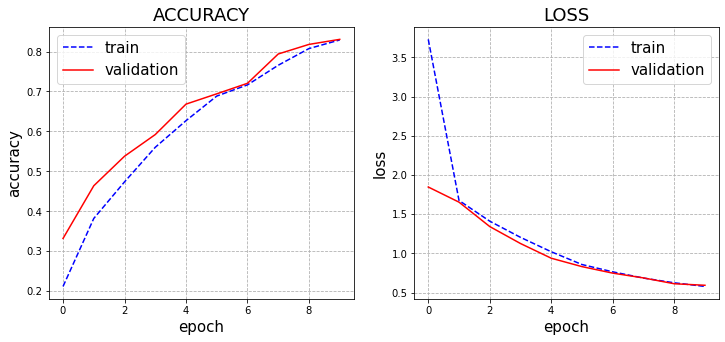

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],color='blue',linestyle='--',label='train')
plt.plot(hist.history['val_accuracy'],color='red',label='validation')
plt.xlabel('epoch',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.title('ACCURACY',fontsize=18)
plt.legend(fontsize=15)
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],color='blue',linestyle='--',label='train')
plt.plot(hist.history['val_loss'],color='red',label='validation')
plt.xlabel('epoch',fontsize=15)
plt.ylabel('loss',fontsize=15)
plt.title('LOSS',fontsize=18)
plt.legend(fontsize=15)
plt.grid(linestyle='--')